In [5]:
import sys
import importlib
# Make imports work
sys.path.insert(0, '../')


In [6]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from mhealth_anomaly_detection import anomaly_detection, anomaly_performance_metrics
from mhealth_anomaly_detection import format_axis as fa
from mhealth_anomaly_detection import load_refs as lr
importlib.reload(anomaly_detection)


/Users/sakre/Library/Caches/pypoetry/virtualenvs/mhealth-anomaly-detection-wL5GYLvX-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'mhealth_anomaly_detection.anomaly_detection' from '/Users/sakre/Code/dgc/mhealth_anomaly_detection/notebooks/../mhealth_anomaly_detection/anomaly_detection.py'>

In [7]:
# Load ad results
EXPERIMENTS = [
    'exp01',
    # 'exp02',
    # 'exp03'
]
N_SUBJECTS = 100
DAYS_OF_DATA = 120

results_list = []
for exp in EXPERIMENTS:
    fname = f'{exp}_nSubjects-{N_SUBJECTS}_nDays-{DAYS_OF_DATA}.csv'
    fpath = Path('../cache', fname)
    res = pd.read_csv(fpath)
    res['experiment'] = exp
    results_list.append(res)
data_df = pd.concat(results_list).fillna(-1)

anomaly_detector_cols = [d for d in data_df.columns if d.endswith("_anomaly")]
anomaly_detector_cont_cols = [
    d for d in data_df.columns if d.endswith("_anomaly_score")]
groupby_cols = [
    'subject_id',
    # 'correlation_type',
    'window_size',
    'n_features',
    'anomaly_freq',
    'history_type',
    'experiment'
]


In [8]:
performance_df = anomaly_performance_metrics.binaryPerformanceMetrics(
    data=data_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cols,
)

print('Accuracy')
print(performance_df.groupby('model').accuracy.describe().round(3))
print('F1')
print(performance_df.groupby('model').accuracy.describe().round(3))
print('Sensitivity')
print(performance_df.groupby('model').sensitivity.describe().round(3))
print('Specificity')
print(performance_df.groupby('model').specificity.describe().round(3))


100%|██████████| 2400/2400 [00:04<00:00, 516.26it/s]


Accuracy
                  count   mean    std    min    25%    50%    75%    max
model                                                                   
IsolationForest  2400.0  0.700  0.142  0.375  0.567  0.742  0.808  0.950
NMF_003          2400.0  0.804  0.157  0.483  0.746  0.875  0.917  0.975
PCA_003          2400.0  0.810  0.156  0.475  0.748  0.883  0.917  0.992
RollingMean      2400.0  0.806  0.164  0.458  0.740  0.883  0.917  0.983
SVM_poly         2400.0  0.573  0.063  0.417  0.525  0.575  0.617  0.767
SVM_rbf          2400.0  0.734  0.154  0.408  0.621  0.792  0.850  0.967
SVM_sigmoid      2400.0  0.572  0.061  0.408  0.525  0.567  0.617  0.808
F1
                  count   mean    std    min    25%    50%    75%    max
model                                                                   
IsolationForest  2400.0  0.700  0.142  0.375  0.567  0.742  0.808  0.950
NMF_003          2400.0  0.804  0.157  0.483  0.746  0.875  0.917  0.975
PCA_003          2400.0  0.810  0.156  

In [9]:
performance_cont_df = anomaly_performance_metrics.continuousPerformanceMetrics(
    data=data_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cont_cols,
)

print('Average Precision')
print(performance_cont_df.groupby('model').average_precision.describe().round(3))


100%|██████████| 2400/2400 [00:08<00:00, 277.84it/s]

Average Precision
                  count   mean    std    min    25%    50%    75%    max
model                                                                   
IsolationForest  2400.0  0.183  0.182  0.033  0.058  0.104  0.229  0.492
NMF_003          2400.0  0.435  0.187  0.030  0.279  0.451  0.587  0.950
PCA_003          2400.0  0.481  0.195  0.031  0.321  0.514  0.633  1.000
RollingMean      2400.0  0.451  0.198  0.035  0.294  0.482  0.589  1.000
SVM_poly         2400.0  0.255  0.180  0.021  0.096  0.198  0.467  0.893
SVM_rbf          2400.0  0.177  0.178  0.025  0.052  0.113  0.318  0.575
SVM_sigmoid      2400.0  0.184  0.185  0.022  0.050  0.103  0.260  0.546


In [10]:
performance_df.loc[performance_df.history_type == -
                   1, 'history_type'] = 'history_all_28'
performance_cont_df.loc[performance_cont_df.history_type == -
                        1, 'history_type'] = 'history_all_28'
# performance_df.loc[performance_df.correlation_type == -1, 'corelation_type'] = 'Independent'


In [12]:

palette = lr.get_colors('../lib/colors.json')
model_order = [
    'RollingMean',
    'PCA_003',
    'NMF_003',
    'IsolationForest',
    'SVM_rbf',
    'SVM_poly',
    'SVM_sigmoid',
]
palette['model']


{'Linear Regression': '#718093',
 'Random Forest Regression': '#192a56',
 'Gradient Boosting Regression': '#487eb0',
 'Mixed Effects Random Forest': '#AF58BA',
 'Baseline': '#1A1A1A',
 'Logistic Regression': '#718093',
 'Random Forest Classifier': '#192a56',
 'Gradient Boosting Classifier': '#487eb0',
 'PCA': '#44AA99',
 'PCA_003': '#44AA99',
 'PCA_005': '#44AA99',
 'PCA_010': '#44AA99',
 'PCA_020': '#44AA99',
 'NMF': '#117733',
 'NMF_003': '#117733',
 'NMF_005': '#117733',
 'NMF_010': '#117733',
 'NMF_020': '#117733',
 'PCAGrid': '#16a085',
 'PCAGrid_003': '#16a085',
 'PCAGrid_005': '#16a085',
 'PCAGrid_010': '#16a085',
 'PCAGrid_020': '#16a085',
 'SVM': '#EE99AA',
 'SVM_rbf': '#EE99AA',
 'SVM_poly': '#994455',
 'SVM_sigmoid': '#882255',
 'IsolationForest': '#DDCC77',
 'RollingMean': '#88CCEE'}

In [13]:

performance_df = performance_df.merge(performance_cont_df.rename(
    columns={'average_precision': 'Average Precision'}), how='outer')


<Axes: xlabel='Performance', ylabel='metric'>

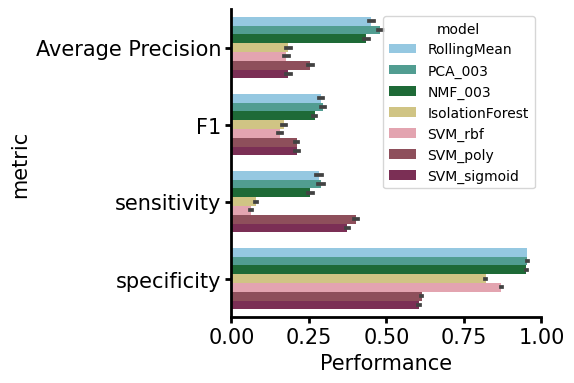

In [14]:
perf_melt = performance_df.melt(
    id_vars=groupby_cols + ['model'],
    value_vars=['Average Precision', 'F1', 'sensitivity', 'specificity'],
    var_name='metric',
    value_name='Performance'
)
perf_melt.loc[perf_melt.model == 'svm', 'model'] = 'SVM'
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(
    y='metric',
    x='Performance',
    hue='model',
    palette=palette['model'],
    hue_order=model_order,
    data=perf_melt,
    ax=ax
)
ax.set_xlim(0, 1)
fa.despine_thicken_axes(ax, fontsize=15)


In [15]:
performance_df['anomaly_freq'].unique()


array([ 2,  7, 14, 28])

Average Precision     F1  sensitivity  \
model           history_type                                             
IsolationForest history_0_to_28              0.183  0.160        0.088   
                history_all_28               0.183  0.180        0.071   
NMF_003         history_0_to_28              0.424  0.260        0.243   
                history_all_28               0.446  0.276        0.266   
PCA_003         history_0_to_28              0.463  0.286        0.275   
                history_all_28               0.498  0.305        0.303   
RollingMean     history_0_to_28              0.455  0.287        0.278   
                history_all_28               0.447  0.292        0.284   
SVM_poly        history_0_to_28              0.256  0.212        0.406   
                history_all_28               0.254  0.208        0.396   
SVM_rbf         history_0_to_28              0.176  0.150        0.063   
                history_all_28               0.178  0.161        0.062   
SVM_sigmoid     history_0_to_28              0.183  0.210        0.377   
                history_all_28               0.184  0.215        0.371   

                                 specificity  
model           history_type                  
IsolationForest history_0_to_28        0.793  
                history_all_28         0.846  
NMF_003         history_0_to_28        0.951  
                history_all_28         0.952  
PCA_003         history_0_to_28        0.953  
                history_all_28         0.955  
RollingMean     history_0_to_28        0.954  
                history_all_28         0.951  
SVM_poly        history_0_to_28        0.615  
                history_all_28         0.613  
SVM_rbf         history_0_to_28        0.858  
                history_all_28         0.885  
SVM_sigmoid     history_0_to_28        0.600  
                history_all_28         0.611

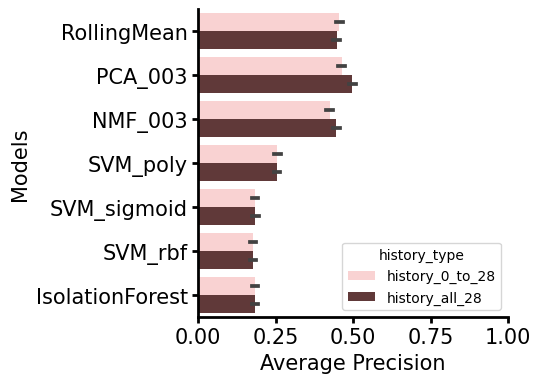

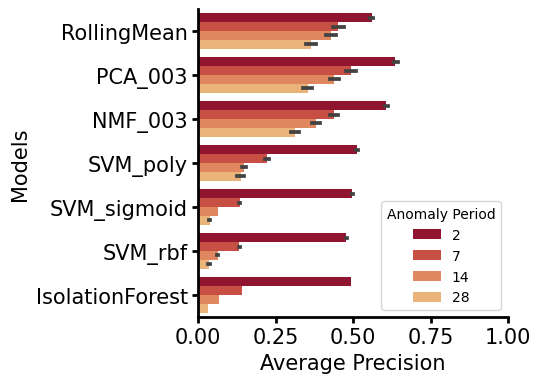

In [46]:
exp = 'exp01'
criteria = (
    (performance_df.experiment == exp)
)
palette['history_type'] = {
    'history_0_to_28': "#FFCCCC",
    'history_all_28': "#663333"
}
performance_df = performance_df.rename(
    columns={'anomaly_freq': 'Anomaly Period'}
)
palette['Anomaly Period'] = {
    2: "#A50026",
    7: "#DD3D2D",
    14: "#F67E4B",
    28: "#FDB366"
}
metric = 'Average Precision'
for i, diff in enumerate(['history_type', 'Anomaly Period']):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.barplot(
        y='model',
        x=metric,
        hue=diff,
        palette=palette[diff],
        data=performance_df[criteria],
        ax=ax
    )
    ax.set_xlim(0, 1)
    # ax.legend().remove()
    ax.set_xlabel(metric)
    ax.set_ylabel('Models')
    fa.despine_thicken_axes(ax, fontsize=15)
performance_df[criteria].groupby(['model', 'history_type'])[
    [metric, 'F1', 'sensitivity', 'specificity']].mean().round(3)


In [17]:
N_SUBJECTS = 100
DAYS_OF_DATA = 120

exp = 'exp02'
fname = f'{exp}_nSubjects-{N_SUBJECTS}_nDays-{DAYS_OF_DATA}.csv'
fpath = Path('../cache', fname)
exp2_df = pd.read_csv(fpath)
exp2_df['experiment'] = exp


In [18]:
exp2_df['n_features'].unique()
anomaly_detector_cols = [d for d in exp2_df.columns if d.endswith("_anomaly")]
anomaly_detector_cont_cols = [
    d for d in exp2_df.columns if d.endswith("_anomaly_score")]
groupby_cols = [
    'subject_id',
    'window_size',
    'n_features',
    'anomaly_freq',
    'experiment'
]
performance2_df = anomaly_performance_metrics.binaryPerformanceMetrics(
    data=exp2_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cols,
)
performance2_cont_df = anomaly_performance_metrics.continuousPerformanceMetrics(
    data=exp2_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cont_cols,
)
performance2_df = performance2_df.merge(performance2_cont_df.rename(
    columns={'average_precision': 'Average Precision'}), how='outer')


100%|██████████| 500/500 [00:01<00:00, 263.26it/s]


In [19]:
performance2_df


,subject_id,window_size,n_features,anomaly_freq,experiment,model,true_positives,true_negatives,false_positives,false_negatives,sensitivity,precision,specificity,accuracy,F1,Average Precision
0,SID_0,14,5,28,exp02,RollingMean,3,111,5,1,0.75,0.375000,0.956897,0.950000,0.500000,0.551587
1,SID_0,14,5,28,exp02,PCA_005,0,116,0,4,0.00,NaN,1.000000,0.966667,NaN,0.037736
2,SID_0,14,5,28,exp02,PCAgrid_005,0,116,0,4,0.00,NaN,1.000000,0.966667,NaN,0.037736
3,SID_0,14,5,28,exp02,NMF_005,2,109,7,2,0.50,0.222222,0.939655,0.925000,0.307692,0.596753
4,SID_0,14,5,28,exp02,SVM_poly,3,76,40,1,0.75,0.069767,0.655172,0.658333,0.127660,0.277500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,SID_99,14,100,28,exp02,PCAgrid_005,2,111,5,2,0.50,0.285714,0.956897,0.941667,0.363636,0.570076
3496,SID_99,14,100,28,exp02,NMF_005,4,110,6,0,1.00,0.400000,0.948276,0.950000,0.571429,1.000000
3497,SID_99,14,100,28,exp02,SVM_poly,0,92,24,4,0.00,0.000000,0.793103,0.766667,NaN,0.024256
3498,SID_99,14,100,28,exp02,SVM_sigmoid,0,87,29,4,0.00,0.000000,0.750000,0.725000,NaN,0.031460


F1  sensitivity  specificity
model       n_features                                 
NMF_005     5           0.242        0.388        0.929
            10          0.427        0.688        0.947
            25          0.582        0.950        0.953
            50          0.582        0.995        0.948
            100         0.557        1.000        0.943
PCA_005     5             NaN        0.000        1.000
            10          0.465        0.748        0.947
            25          0.562        0.978        0.946
            50          0.553        0.998        0.942
            100         0.523        0.998        0.935
PCAgrid_005 5             NaN        0.000        1.000
            10          0.397        0.568        0.949
            25          0.509        0.805        0.951
            50          0.545        0.908        0.949
            100         0.576        0.992        0.948
RollingMean 5           0.330        0.490        0.942
            10          0.420        0.652        0.948
            25          0.540        0.888        0.949
            50          0.574        0.965        0.949
            100         0.636        1.000        0.957
SVM_poly    5           0.078        0.440        0.615
            10          0.083        0.392        0.650
            25          0.073        0.235        0.718
            50          0.075        0.090        0.776
            100         0.095        0.040        0.842
SVM_rbf     5           0.143        0.020        0.898
            10            NaN        0.000        0.966
            25            NaN        0.000        0.998
            50            NaN        0.000        1.000
            100           NaN        0.000        1.000
SVM_sigmoid 5           0.072        0.358        0.634
            10          0.072        0.292        0.651
            25          0.067        0.222        0.693
            50          0.065        0.155        0.722
            100         0.072        0.085        0.760

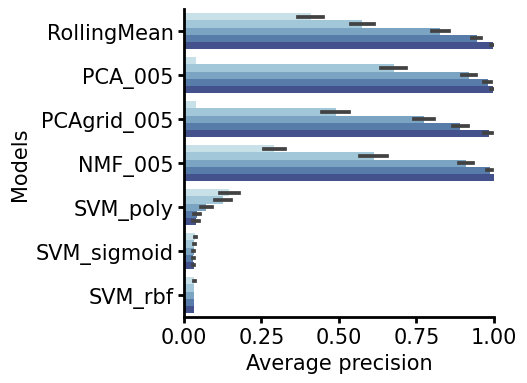

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))
subset = performance2_df[
    (performance2_df.window_size == 14) &
    (performance2_df.anomaly_freq == 28)
]
palette['n_features'] = {
    5: "#C2E4EF",
    10: "#98CAE1",
    25: "#6EA6CD",
    50: "#4a7BB7",
    100: "#364B9A",
}
metric = 'Average Precision'
diff = 'n_features'
sns.barplot(
    y='model',
    x=metric,
    hue=diff,
    palette=palette[diff],
    data=subset,
    ax=ax
)
ax.set_xlim(0, 1)
ax.set_ylabel('Models')
ax.set_xlabel(metric.capitalize())
ax.legend().remove()
fa.despine_thicken_axes(ax, fontsize=15)
subset.groupby(['model', diff])[
    ['F1', 'sensitivity', 'specificity']].mean().round(3)


In [21]:
subset[subset.model == 'SVM_rbf']


,subject_id,window_size,n_features,anomaly_freq,experiment,model,true_positives,true_negatives,false_positives,false_negatives,sensitivity,precision,specificity,accuracy,F1,Average Precision
6,SID_0,14,5,28,exp02,SVM_rbf,0,106,10,4,0.0,0.0,0.913793,0.883333,NaN,0.033333
13,SID_0,14,10,28,exp02,SVM_rbf,0,114,2,4,0.0,0.0,0.982759,0.950000,NaN,0.033333
20,SID_0,14,25,28,exp02,SVM_rbf,0,116,0,4,0.0,NaN,1.000000,0.966667,NaN,0.033333
27,SID_0,14,50,28,exp02,SVM_rbf,0,116,0,4,0.0,NaN,1.000000,0.966667,NaN,0.033333
34,SID_0,14,100,28,exp02,SVM_rbf,0,116,0,4,0.0,NaN,1.000000,0.966667,NaN,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,SID_99,14,5,28,exp02,SVM_rbf,0,107,9,4,0.0,0.0,0.922414,0.891667,NaN,0.028333
3478,SID_99,14,10,28,exp02,SVM_rbf,0,113,3,4,0.0,0.0,0.974138,0.941667,NaN,0.033333
3485,SID_99,14,25,28,exp02,SVM_rbf,0,116,0,4,0.0,NaN,1.000000,0.966667,NaN,0.033333
3492,SID_99,14,50,28,exp02,SVM_rbf,0,116,0,4,0.0,NaN,1.000000,0.966667,NaN,0.033333


In [25]:
N_SUBJECTS = 100
DAYS_OF_DATA = 120

exp = 'exp03'
fname = f'{exp}_nSubjects-{N_SUBJECTS}_nDays-{DAYS_OF_DATA}.csv'
fpath = Path('../cache', fname)
exp3_df = pd.read_csv(fpath)
exp3_df['experiment'] = exp


In [26]:
anomaly_detector_cols = [d for d in exp3_df.columns if d.endswith("_anomaly")]
anomaly_detector_cont_cols = [
    d for d in exp3_df.columns if d.endswith("_anomaly_score")]
groupby_cols = [
    'subject_id',
    'window_size',
    'correlation_type',
    'n_features',
    'anomaly_freq',
    'experiment'
]
performance3_df = anomaly_performance_metrics.binaryPerformanceMetrics(
    data=exp3_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cols,
)
performance3_cont_df = anomaly_performance_metrics.continuousPerformanceMetrics(
    data=exp3_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cont_cols,
)
performance3_df = performance3_df.merge(performance3_cont_df.rename(
    columns={'average_precision': 'Average Precision'}), how='outer')


100%|██████████| 300/300 [00:01<00:00, 264.83it/s]


Average Precision     F1  sensitivity  \
model       correlation_type                                          
NMF_005     Independent                   0.899  0.567        0.935   
            Linear                        0.551  0.402        0.625   
            Non-linear                    0.485  0.348        0.505   
PCA_005     Independent                   0.913  0.561        0.970   
            Linear                        0.584  0.396        0.632   
            Non-linear                    0.519  0.367        0.572   
PCAgrid_005 Independent                   0.756  0.510        0.808   
            Linear                        0.520  0.381        0.572   
            Non-linear                    0.474  0.351        0.532   
RollingMean Independent                   0.814  0.535        0.870   
            Linear                        0.520  0.370        0.582   
            Non-linear                    0.507  0.376        0.570   
SVM_poly    Independent                   0.072  0.077        0.230   
            Linear                        0.155  0.079        0.425   
            Non-linear                    0.043  0.070        0.195   
SVM_rbf     Independent                   0.033    NaN        0.000   
            Linear                        0.033  0.250        0.002   
            Non-linear                    0.032  0.153        0.008   
SVM_sigmoid Independent                   0.031  0.069        0.220   
            Linear                        0.035  0.070        0.345   
            Non-linear                    0.036  0.063        0.228   

                              specificity  
model       correlation_type               
NMF_005     Independent             0.951  
            Linear                  0.947  
            Non-linear              0.945  
PCA_005     Independent             0.946  
            Linear                  0.944  
            Non-linear              0.941  
PCAgrid_005 Independent             0.952  
            Linear                  0.946  
            Non-linear              0.941  
RollingMean Independent             0.950  
            Linear                  0.943  
            Non-linear              0.942  
SVM_poly    Independent             0.716  
            Linear                  0.635  
            Non-linear              0.696  
SVM_rbf     Independent             0.998  
            Linear                  0.960  
            Non-linear              0.933  
SVM_sigmoid Independent             0.689  
            Linear                  0.636  
            Non-linear              0.666

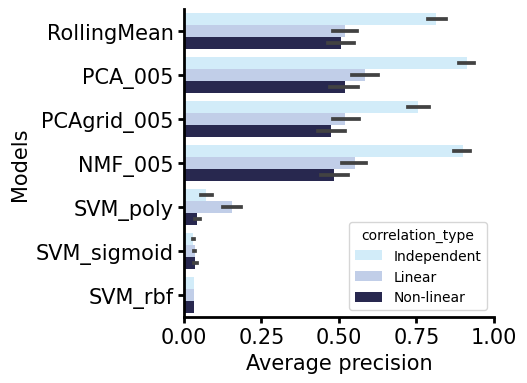

In [27]:
fig, ax = plt.subplots(figsize=(4, 4))
palette['correlation_type'] = {
    'Independent': "#CCEEFF",
    'Linear': "#BBCCEE",
    'Non-linear': "#222255"
}
metric = 'Average Precision'
diff = 'correlation_type'
sns.barplot(
    y='model',
    x=metric,
    hue=diff,
    palette=palette[diff],
    data=performance3_df,
    ax=ax
)
ax.set_xlim(0, 1)
# ax.legend().remove()
ax.set_ylabel('Models')
ax.set_xlabel(metric.capitalize())
fa.despine_thicken_axes(ax, fontsize=15)
performance3_df.groupby(['model', diff])[
    ['Average Precision', 'F1', 'sensitivity', 'specificity']].mean().round(3)


In [38]:
N_SUBJECTS = 100
DAYS_OF_DATA = 120

exp = 'exp04'
fname = f'{exp}_nSubjects-{N_SUBJECTS}_nDays-{DAYS_OF_DATA}.csv'
fpath = Path('../cache', fname)
exp4_df = pd.read_csv(fpath)
exp4_df['experiment'] = exp


In [39]:

groupby_cols = [
    'subject_id',
    'window_size',
    'n_features',
    'anomaly_freq',
    'history_type',
    'experiment'
]
anomaly_detector_cols = [d for d in exp4_df.columns if d.endswith("_anomaly")]
anomaly_detector_cont_cols = [
    d for d in exp4_df.columns if d.endswith("_anomaly_score")]
performance4_df = anomaly_performance_metrics.binaryPerformanceMetrics(
    data=exp4_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cols,
)
performance4_cont_df = anomaly_performance_metrics.continuousPerformanceMetrics(
    data=exp4_df,
    groupby_cols=groupby_cols,
    anomaly_detector_cols=anomaly_detector_cont_cols,
)
performance4_df = performance4_df.merge(performance4_cont_df.rename(
    columns={'average_precision': 'Average Precision'}), how='outer')


100%|██████████| 500/500 [00:01<00:00, 268.29it/s]


In [40]:
performance4_df


,subject_id,window_size,n_features,anomaly_freq,history_type,experiment,model,true_positives,true_negatives,false_positives,false_negatives,sensitivity,precision,specificity,accuracy,F1,Average Precision
0,SID_0,14,5,28,history_all_28,exp04,RollingMean,3,111,5,1,0.75,0.375000,0.956897,0.950000,0.500000,0.551587
1,SID_0,14,5,28,history_all_28,exp04,PCAgrid_005,0,116,0,4,0.00,NaN,1.000000,0.966667,NaN,0.037736
2,SID_0,14,5,28,history_all_28,exp04,PCA_005,0,116,0,4,0.00,NaN,1.000000,0.966667,NaN,0.037736
3,SID_0,14,5,28,history_all_28,exp04,NMF_005,2,109,7,2,0.50,0.222222,0.939655,0.925000,0.307692,0.596753
4,SID_0,14,5,28,history_all_28,exp04,SVM_poly,3,76,40,1,0.75,0.069767,0.655172,0.658333,0.127660,0.277500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,SID_99,14,100,28,history_all_28,exp04,PCA_005,0,108,8,4,0.00,0.000000,0.931034,0.900000,NaN,0.059375
3496,SID_99,14,100,28,history_all_28,exp04,NMF_005,0,110,6,4,0.00,0.000000,0.948276,0.916667,NaN,0.037003
3497,SID_99,14,100,28,history_all_28,exp04,SVM_poly,1,91,25,3,0.25,0.038462,0.784483,0.766667,0.066667,0.040963
3498,SID_99,14,100,28,history_all_28,exp04,SVM_sigmoid,1,88,28,3,0.25,0.034483,0.758621,0.741667,0.060606,0.038462


Average Precision     F1  sensitivity  specificity
model       n_features                                                    
NMF_005     5                       0.290  0.242        0.388        0.929
            10                      0.092  0.190        0.140        0.919
            25                      0.090  0.201        0.108        0.937
            50                      0.081  0.192        0.090        0.941
            100                     0.071  0.210        0.065        0.941
PCA_005     5                       0.038    NaN        0.000        1.000
            10                      0.038    NaN        0.000        1.000
            25                      0.089  0.214        0.110        0.935
            50                      0.087  0.204        0.112        0.939
            100                     0.081  0.196        0.080        0.938
PCAgrid_005 5                       0.038    NaN        0.000        1.000
            10                      0.038    NaN        0.000        1.000
            25                      0.086  0.217        0.108        0.941
            50                      0.080  0.204        0.082        0.941
            100                     0.082  0.214        0.085        0.944
RollingMean 5                       0.410  0.330        0.490        0.942
            10                      0.097  0.192        0.125        0.928
            25                      0.094  0.203        0.102        0.933
            50                      0.088  0.220        0.105        0.940
            100                     0.084  0.201        0.105        0.936
SVM_poly    5                       0.146  0.078        0.440        0.615
            10                      0.073  0.075        0.450        0.609
            25                      0.082  0.085        0.332        0.699
            50                      0.078  0.094        0.258        0.776
            100                     0.071  0.122        0.168        0.853
SVM_rbf     5                       0.033  0.143        0.020        0.898
            10                      0.044  0.152        0.105        0.904
            25                      0.039    NaN        0.000        0.997
            50                      0.039    NaN        0.000        1.000
            100                     0.041    NaN        0.000        1.000
SVM_sigmoid 5                       0.037  0.072        0.358        0.634
            10                      0.042  0.075        0.388        0.633
            25                      0.040  0.081        0.332        0.696
            50                      0.038  0.090        0.260        0.752
            100                     0.038  0.096        0.192        0.806

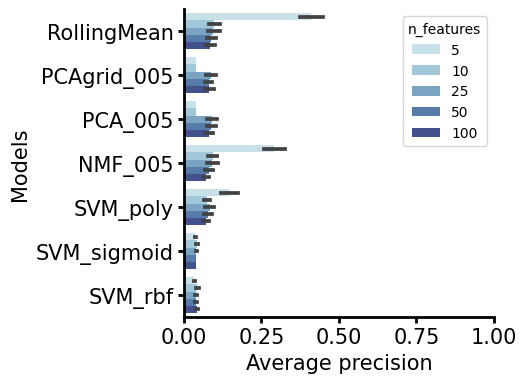

In [41]:

fig, ax = plt.subplots(figsize=(4, 4))
palette['n_features'] = {
    5: "#C2E4EF",
    10: "#98CAE1",
    25: "#6EA6CD",
    50: "#4a7BB7",
    100: "#364B9A",
}
metric = 'Average Precision'
diff = 'n_features'
sns.barplot(
    y='model',
    x=metric,
    hue=diff,
    palette=palette[diff],
    data=performance4_df[performance4_df.n_features < 500],
    ax=ax
)
ax.set_xlim(0, 1)
# ax.legend().remove()
ax.set_ylabel('Models')
ax.set_xlabel(metric.capitalize())
fa.despine_thicken_axes(ax, fontsize=15)
performance4_df.groupby(['model', diff])[
    ['Average Precision', 'F1', 'sensitivity', 'specificity']].mean().round(3)


In [42]:
performance4_df


,subject_id,window_size,n_features,anomaly_freq,history_type,experiment,model,true_positives,true_negatives,false_positives,false_negatives,sensitivity,precision,specificity,accuracy,F1,Average Precision
0,SID_0,14,5,28,history_all_28,exp04,RollingMean,3,111,5,1,0.75,0.375000,0.956897,0.950000,0.500000,0.551587
1,SID_0,14,5,28,history_all_28,exp04,PCAgrid_005,0,116,0,4,0.00,NaN,1.000000,0.966667,NaN,0.037736
2,SID_0,14,5,28,history_all_28,exp04,PCA_005,0,116,0,4,0.00,NaN,1.000000,0.966667,NaN,0.037736
3,SID_0,14,5,28,history_all_28,exp04,NMF_005,2,109,7,2,0.50,0.222222,0.939655,0.925000,0.307692,0.596753
4,SID_0,14,5,28,history_all_28,exp04,SVM_poly,3,76,40,1,0.75,0.069767,0.655172,0.658333,0.127660,0.277500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,SID_99,14,100,28,history_all_28,exp04,PCA_005,0,108,8,4,0.00,0.000000,0.931034,0.900000,NaN,0.059375
3496,SID_99,14,100,28,history_all_28,exp04,NMF_005,0,110,6,4,0.00,0.000000,0.948276,0.916667,NaN,0.037003
3497,SID_99,14,100,28,history_all_28,exp04,SVM_poly,1,91,25,3,0.25,0.038462,0.784483,0.766667,0.066667,0.040963
3498,SID_99,14,100,28,history_all_28,exp04,SVM_sigmoid,1,88,28,3,0.25,0.034483,0.758621,0.741667,0.060606,0.038462
